# TODO

1. [ ] dependent_plot does not work
2. [ ] interaction value VS dependent value ??? 

# Module 

In [13]:
# make sure to reload new code without restart the kernel
%matplotlib inline
%load_ext autoreload
%autoreload 2
# enable code like `from src.config import`
import sys
sys.path.append('../')

# module 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# custom code
from src.config import code_base_dir
from scripts.train_config import train_config_detail
from scripts.train_config import raw_data_path, dir_mark, debug, model_dir


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Config

In [14]:
base_dir = '../'
dir_mark = 'iris_cla'

In [33]:
pipeline_class = train_config_detail[dir_mark]['pipeline_class']
feature_creator_class = train_config_detail[dir_mark]['feature_creator']
model_params_config = train_config_detail[dir_mark].get('model_params', {})
# grid_search_dict = train_config_detail[dir_mark].get('grid_search_dict', None)
# model_params = train_config_detail[dir_mark].get('model_params', {})
train_valid = train_config_detail[dir_mark].get('train_valid', False)
dense_features = train_config_detail[dir_mark].get('dense_features', None)
sparse_features = train_config_detail[dir_mark].get('sparse_features', None)
feature_clean_func = train_config_detail[dir_mark].get('feature_clean_func', None)
additional_train_params = train_config_detail[dir_mark].get('additional_train_params', {})

epochs = train_config_detail[dir_mark].get('epochs', None)
batch_size = train_config_detail[dir_mark].get('batch_size', None)
dense_to_sparse = train_config_detail[dir_mark].get('dense_to_sparse', None)
task = train_config_detail[dir_mark].get('task', None) # params for deepFM

target_col = train_config_detail[dir_mark]['target_col']
feature_used = dense_features + sparse_features
# assert feature_used is not None
if not train_config_detail[dir_mark].get('data_dir_mark', False):
    target_raw_data_dir = os.path.join(raw_data_path, dir_mark)
else:
    target_raw_data_dir = os.path.join(raw_data_path, train_config_detail[dir_mark].get('data_dir_mark', False))
# logging.info(f"Reading data from {target_raw_data_dir}")
model_path = os.path.join(model_dir, dir_mark)


In [34]:
model_path

'model_training/iris_cla'

In [35]:
target_raw_data_dir

'data/raw_data/iris_cla'

In [36]:
model_path = os.path.join(base_dir, model_path)
data_path = os.path.join(base_dir, target_raw_data_dir, 'train.csv')

In [37]:
model_path

'../model_training/iris_cla'

In [38]:
data_path

'../data/raw_data/iris_cla/train.csv'

# Data & Model 

In [39]:
df = pd.read_csv(data_path)[feature_used]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              410 non-null    float64
 1   mean_texture             410 non-null    float64
 2   mean_perimeter           410 non-null    float64
 3   mean_area                410 non-null    float64
 4   mean_smoothness          410 non-null    float64
 5   mean_compactness         410 non-null    float64
 6   mean_concavity           410 non-null    float64
 7   mean_concave_points      410 non-null    float64
 8   mean_symmetry            410 non-null    float64
 9   mean_fractal_dimension   410 non-null    float64
 10  radius_error             410 non-null    float64
 11  texture_error            410 non-null    float64
 12  perimeter_error          410 non-null    float64
 13  area_error               410 non-null    float64
 14  smoothness_error         4

In [41]:
model_path

'../model_training/iris_cla'

In [42]:
pipeline = pipeline_class(model_params={}, model_training=False, model_path=model_path)

In [43]:
pipeline.pipeline

PMMLPipeline(steps=[('data_transformer', ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                 ['mean_fractal_dimension', 'texture_error',
                                  'perimeter_error', 'fractal_dimension_error',
                                  'worst_smoothness', 'worst_perimeter',
                                  'area_error', 'worst_fractal_dimension',
                                  'mean_texture', 'symmetry_error',
                                  'concave_points_error', 'worst_radius',
                                  'concavity_error', 'mean_perimeter',
                                  'mean_radius', 'mean_compactness',
                                  'smoothness_error', 'compactness_error',
                                  'worst_concave_points', 'worst_symmetry',
                                  'radius_error', 'mean_concavity',
                                  'mean_smoothness', 'worst_texture',
                    

In [45]:
model = pipeline.pipeline['model']
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# SHAP Value 

In [46]:
explainer = shap.Explainer(model=model)

In [51]:
shap_values = explainer(df)
shap_values.shape

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(410, 30)

In [57]:
# shap_values[4]?

## summary_plot 

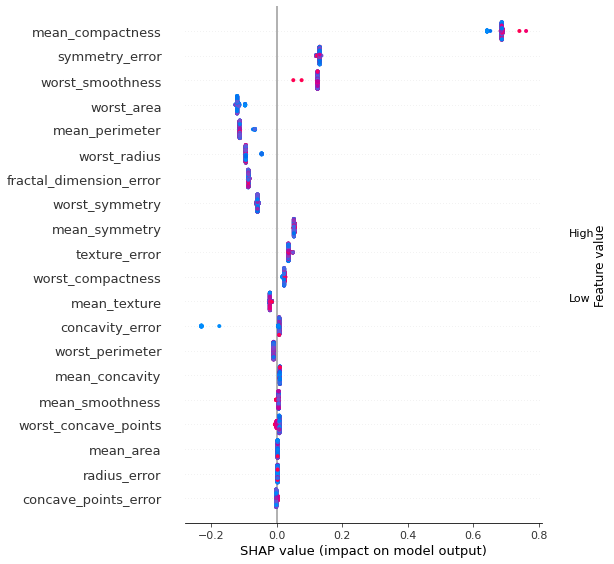

In [64]:
shap.summary_plot(shap_values, df)

In [65]:
# shap.plots.beeswarm(shap_values, #max_display=show_feature_num, 
#                     show=False
#                    )

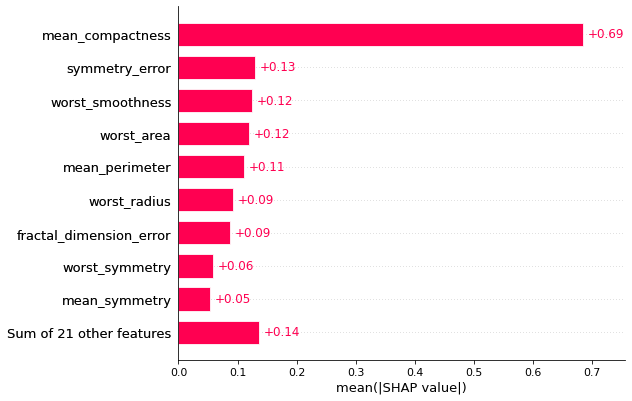

In [83]:
shap.plots.bar(shap_values #.abs.mean(0), #show=False, max_display=show_feature_num
              )

In [84]:
# shap.plots.bar(shap_values.abs.mean(0), #show=False, max_display=show_feature_num
#               )

## dependence_plot & scatter_plot

In [72]:
feature_used

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

In [91]:
# shap.dependence_plot('worst_symmetry', shap_values, df)


In [77]:
# for col in feature_used:
#     try:    
#         shap.dependence_plot(col, shap_values, df)
#     except:
#         print(col)

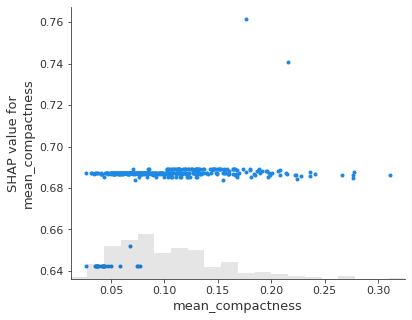

In [89]:
shap.plots.scatter(shap_values[:, 'mean_compactness'],
#                    color=shap_values[:, 'symmetry_error']
                  )

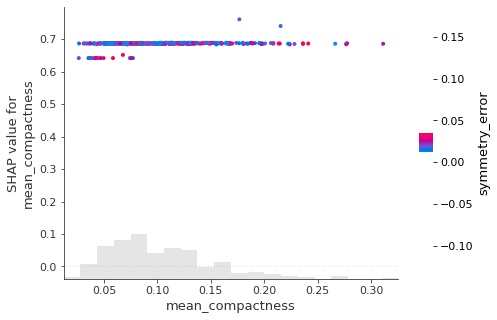

In [90]:
shap.plots.scatter(shap_values[:, 'mean_compactness'], color=shap_values[:, 'symmetry_error'])

## interaction_value 

In [78]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(df)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [79]:
shap_interaction_values.shape

(410, 30, 30)

In [80]:
feature_used

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

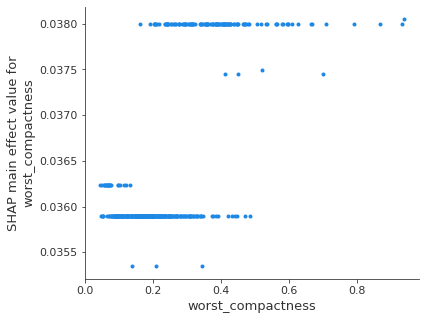

In [81]:
shap.dependence_plot(
    ('worst_compactness', 'worst_compactness'),
    shap_interaction_values, 
    df
)

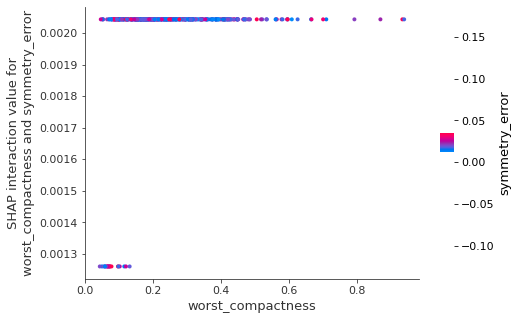

In [82]:
shap.dependence_plot(
    ('worst_compactness', 'symmetry_error'),
    shap_interaction_values, 
    df
)

# Individual_plot

Refer to [notebook in ML&DS repository](https://github.com/xiaoye-hua/MachineLearning_DataScience/blob/master/notebooks/20220324_shaply_value.ipynb)

# Ref 

1. [NHANES I Survival Model](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/NHANES%20I%20Survival%20Model.html)
2. [Analyse Interaction with SHAP](https://towardsdatascience.com/analysing-interactions-with-shap-8c4a2bc11c2a#:~:text=SHAP%20values%20are%20used%20to,their%20main%20and%20interaction%20effects.)